# Tutoriel Altair - Partie 1/2

Présentation de quelques fonctionnalités et concepts fondamentaux

### Visualisation avec Vega, Vega-lite et Altair

- Présentation de l'utilisation de la bibliothèque de visualisation Altair. Ce document s'appuie sur l'excellente [vidéo](https://www.youtube.com/watch?v=ms29ZPUKxbU&t=7425s) de Jake VanderPlas créé à partir de sa présentation lors de la conférence Pycon 2018.
- La visualisation est un des aspects fondamentaux de la science des données et de la représentation des statistiques. Pyplot, Seaborn et d'autres bibliothèques permettent de faire de nombreux graphiques mais ne sont pas toujours très simples d'accès. La manière dont sont représentées les données influencent grandement la perception que l'on en a, et la souplesse d'Altair va permettre de passer facilement d'une réprésentation à une autre.

## Configuration de l'environnement

Intallation de Altair (conseillée avec Jupyterlab) et importation des données de test : 
[Altair getting started](https://altair-viz.github.io/getting_started/installation.html)
```bash
pip install -U altair vega_datasets
```

In [164]:
import altair as alt
import pandas as pd
from vega_datasets import data

Création d'un dataframe panda à partir de la base cars qui répertorie certaines caractéristiques de voitures vendues aux USA, en Europe et au Japon.

In [165]:
cars = data.cars()
cars.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


In [166]:
len(cars)

406

### Modification des valeurs pour passer au S.I.
- Ajout de colonnes plus parlantes: litres au cent et poids en kg
- Suppression des colonnes devenues inutiles

In [167]:
cars['Liters_per_100km'] = round(235.21/cars['Miles_per_Gallon'],2)
cars.drop('Miles_per_Gallon', axis='columns', inplace=True)

cars['Weight_in_kg'] = round(cars['Weight_in_lbs']/2.205)
cars.drop('Weight_in_lbs', axis='columns', inplace=True)

cars.head()

,Acceleration,Cylinders,Displacement,Horsepower,Name,Origin,Year,Liters_per_100km,Weight_in_kg
0,12.0,8,307.0,130.0,chevrolet chevelle malibu,USA,1970-01-01,13.07,1589.0
1,11.5,8,350.0,165.0,buick skylark 320,USA,1970-01-01,15.68,1675.0
2,11.0,8,318.0,150.0,plymouth satellite,USA,1970-01-01,13.07,1558.0
3,12.0,8,304.0,150.0,amc rebel sst,USA,1970-01-01,14.70,1557.0
4,10.5,8,302.0,140.0,ford torino,USA,1970-01-01,13.84,1564.0


## Introduction

### Choix automatique du type de représentation
Altair offre un choix automatique du type de représentation en fonction du type de données d'une colonne (ici la couleur représente soit des données continues soit des données appartenant à une liste de valeurs)

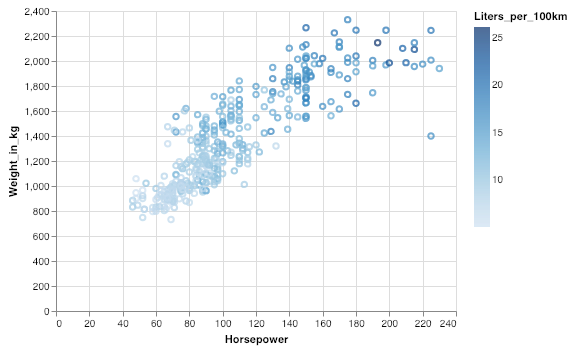

In [168]:
alt.Chart(cars).mark_point().encode(
    x = 'Horsepower',
    y = 'Weight_in_kg',
    color = 'Liters_per_100km'
)


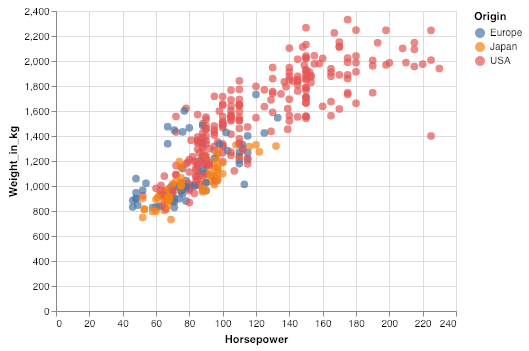

In [169]:
alt.Chart(cars).mark_circle(size=60).encode(
    x = 'Horsepower',
    y = 'Weight_in_kg',
    color = 'Origin'
)

### Interactions

Il est possible de rendre le graphique interactif en appelant directement la méthode interactive(), ce qui permet de zommer sur des valeurs par exemple. Ici de plus tooltip permet d'afficher une fenêtre avec certaines informations sur le point représenté.

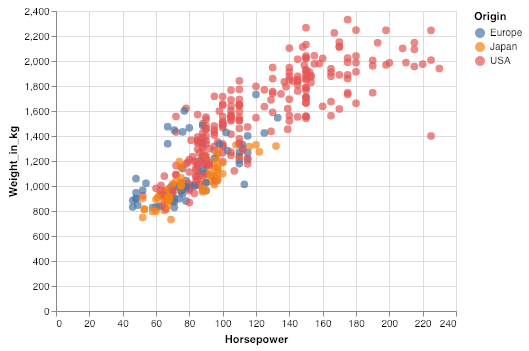

In [170]:
alt.Chart(cars).mark_circle(size=60).encode(
        x = 'Horsepower',
        y = 'Weight_in_kg',
        color = 'Origin',
        tooltip = ['Name', 'Horsepower']
).interactive()

Il est possible de sélectionner un intervalle de valeurs à la souris directement sur le graphique et de le déplacer comme on le souhaite (par défaut l'intervalle est à 2 dimensions selon x et y)

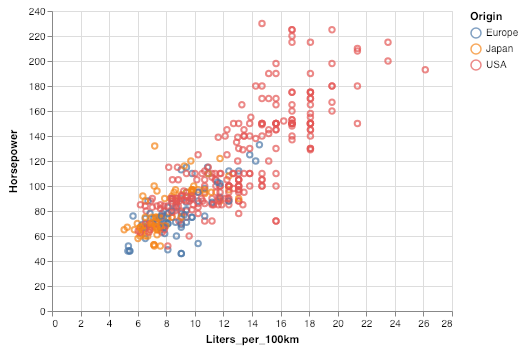

In [171]:
interval =  alt.selection_interval()

alt.Chart(cars).mark_point().encode(
    x = 'Liters_per_100km',
    y = 'Horsepower',
    color = 'Origin'
).properties(
    selection = interval
)

Réduction de l'intervalle à une dimension

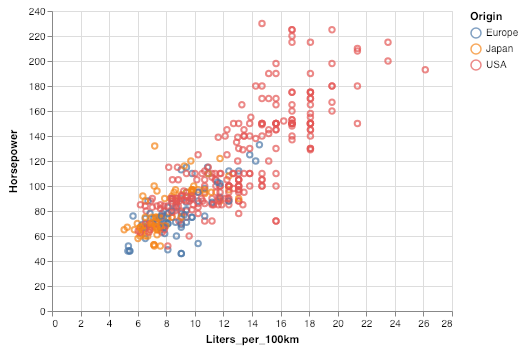

In [172]:
interval =  alt.selection_interval(encodings=['x'])

alt.Chart(cars).mark_point().encode(
    x = 'Liters_per_100km',
    y = 'Horsepower',
    color = 'Origin'
).properties(
    selection = interval
)

Lors de la sélection il y a un signal envoyé au moteur de rendu qui indique quels sont les éléments inclus dans la zone sélectionnée, ce qui permet par exemple de faire un affichage conditionnel.

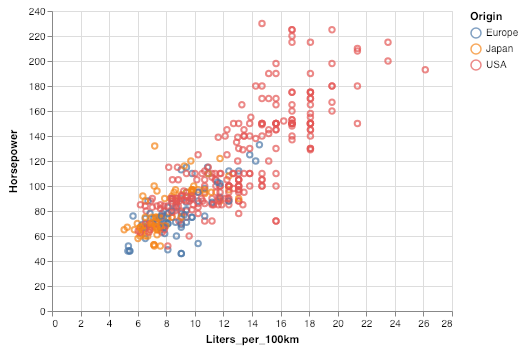

In [173]:
interval =  alt.selection_interval(encodings=['x', 'y'])

alt.Chart(cars).mark_point().encode(
    x = 'Liters_per_100km',
    y = 'Horsepower',
    color = alt.condition(interval, 'Origin', alt.value('lightgrey'))
).properties(
    selection = interval
)

Visualisation dynamique de la manière dont des représentations sont corrélées.

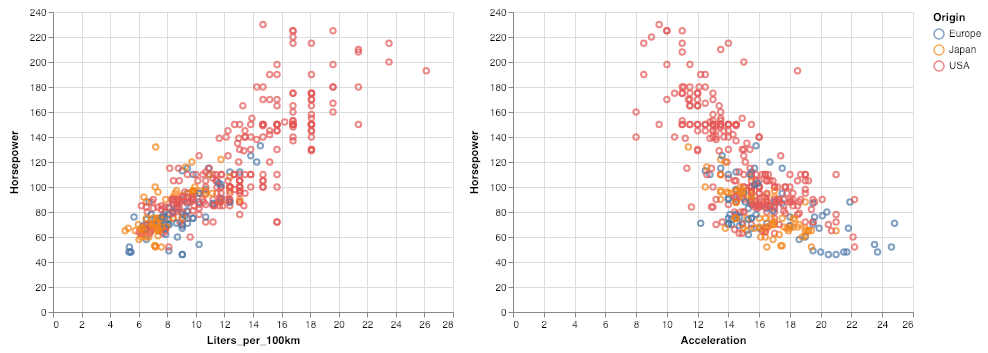

In [174]:
interval =  alt.selection_interval(encodings=['x'])

chart = alt.Chart(cars).mark_point().encode(
    x = 'Liters_per_100km',
    y = 'Horsepower',
    color = alt.condition(interval, 'Origin', alt.value('lightgrey'))
).properties(
    selection = interval
)

# Utilisation de | pour représenter deux graphiques côte à côte
mychart = chart | chart.encode(x='Acceleration')

mychart

Sauvegarde du graphe sous une page html `.save('mychart.html')`

In [175]:
mychart.save('mychart.html')

L'outil de sélection permet de générer dynamiquement un autre graphe qui est lié. Par exemple si on fait un second graphique qui affiche le nombre de véhicules par pays.

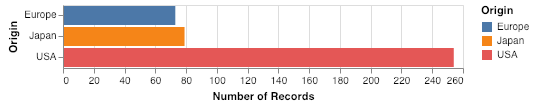

In [176]:
hist = alt.Chart(cars).mark_bar().encode(
    x = 'count()',
    y = 'Origin',
    color = 'Origin'
)
hist

On peut afficher les deux graphiques l'un sous l'autre (avec &) et filtrer le second dynamiquement en fonction de l'intervalle défini sur le premier.

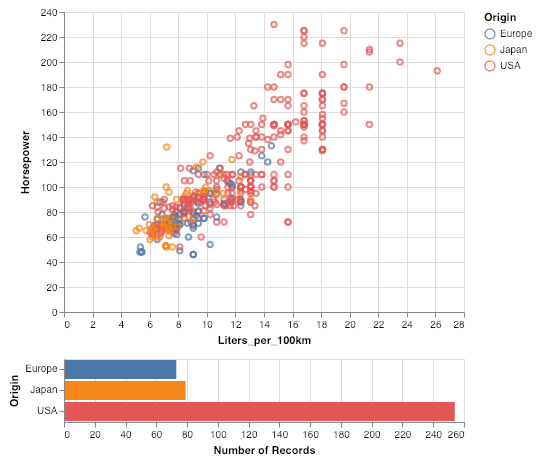

In [177]:
chart & hist.transform_filter(interval)

### Fonctionnement de la bibliothèque

Lors d'un appel à Altair un fichier json est produit. Ce fichier décrit le graphique sous format Vega-lite, cette description est ensuite lue et exploitée par le javascipt du navigateur.
(Vegalite < Vega < D3 )

## Concepts fondamentaux

data, marks, encodings

- data: usuellement données sous la forme d'un tableau (construit au dessus d'un Panda Dataframe)
- mark: manière dont on veut que les données soient représentées
- encode: manière de faire correspondre les caractéristiques visuelles du graphique aux colonnes du jeu de données

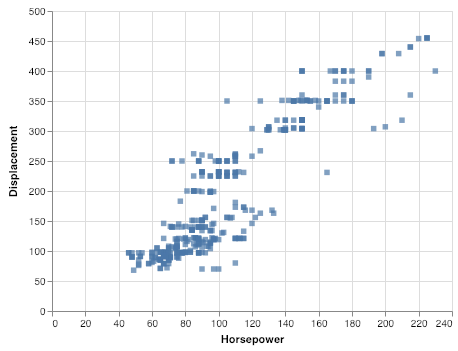

In [178]:
alt.Chart(cars).mark_square().encode(
    x = 'Horsepower',
    y = 'Displacement'
)

Liste de tous les marqueurs disponibles

`alt.Chart.mark` + TAB

Signature d'une fonction: SHIFT + TAB dans les partenthèses d'une fonction

`alt.Chart(` + SHIFT + TAB

### Types de données

Les types de données sont automatiquement choisis par Altair lorsque les données proviennent d'un dataframe Panda. On peut aussi forcer le typage en placant le code du type voulu après le nom de la colonne.

| Types de données  | Code | Description                      |
|-------------------|------|----------------------------------|
| Quantitative      |  Q   | Données continues du type réél   |
| Nominal           |  N   | Noms ou catégories non ordonnées |
| Ordinal           |  O   | Catégorie ordonnée               |
| Temporal          |  T   | Date-time                        |


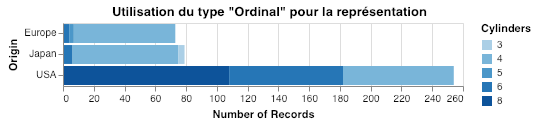

In [180]:
alt.Chart(cars).mark_bar().encode(
    y = 'Origin',
    x = 'count()',
    color = 'Cylinders:O'
).properties(title='Utilisation du type "Ordinal" pour la représentation')

### Utilisation d'un fichier json du web comme dataset

In [181]:
data.cars.url

'https://vega.github.io/vega-datasets/data/cars.json'

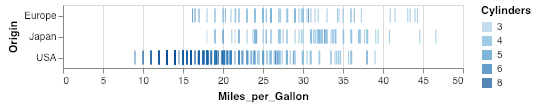

In [182]:
alt.Chart('https://vega.github.io/vega-datasets/data/cars.json').mark_tick().encode(
    x = 'Miles_per_Gallon:Q',
    y = 'Origin:N',
    color = 'Cylinders:O'
)
# Typer les données est obligatoire dans ce cas. 
# Altair ne déduit pas le type de données si l'on ne passe pas un dataframe.

## Fonctions d'aggrégation

Altair offre la possibilité d'effectuer des opérations statistiques directement sur des ensembles de données à représenter. Le comportement est similaire à celui du group by en SQL ou Panda

In [183]:
cars.groupby('Origin')['Liters_per_100km'].mean()

Origin
Europe     8.912286
Japan      8.063038
USA       12.858835
Name: Liters_per_100km, dtype: float64

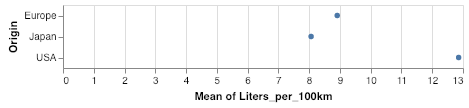

In [184]:
alt.Chart(cars).mark_circle().encode(
    y = 'Origin',
    x = 'mean(Liters_per_100km)'
)

Représentation de la puissance en fonction du nombre de cylindres en faisant apparaître la moyenne, le min et le max

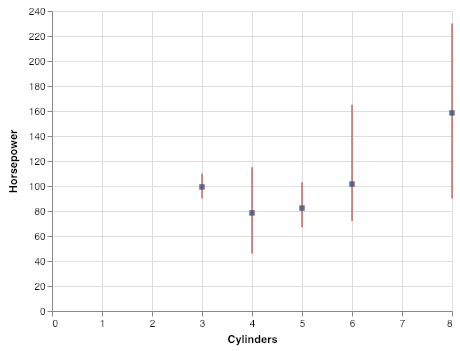

In [185]:
alt.Chart(cars).mark_square().encode(
    x = 'Cylinders',
    y = alt.Y('average(Horsepower)', axis=alt.Axis(title="Horsepower"))
) + alt.Chart(cars).mark_rule(color='firebrick').encode(
    x = 'Cylinders',
    y = 'min(Horsepower)',
    y2 = 'max(Horsepower)'
)

Séparation d'une réprésentation en plusieurs graphiques (équivalent "facets" en R)

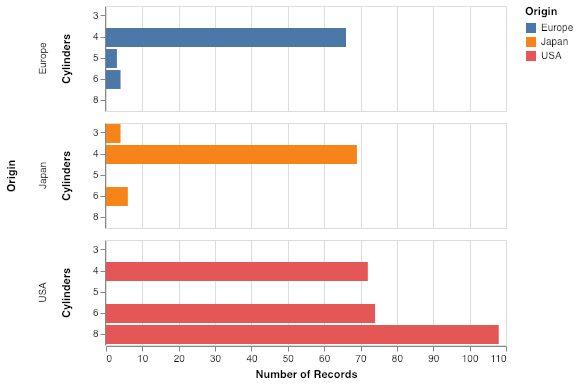

In [186]:
alt.Chart(cars).mark_bar().encode(
    y = 'Cylinders:O',
    row = 'Origin',
    color = 'Origin',
    x = 'count()'
)

## Regroupement de données en intervalles - binning
Le regroupement de données (binning en anglais) est particulièrement utilisé pour clarifier la réprésentation de données. On peut facilement représenter un histogramme du nombre de véhicules par intervalles de consommation de carburant. Les données sont regroupées sur un intervalle de 5 unités (ici litres au cent), ce qui permet de faire des opérations sur l'ensemble (ici de compotabiliser le nombre d'éléments dans l'intervalle, classés par origine). Par ailleurs l'utilisation de la classe `alt.X(...)` permet de passer plus de paramètres à l'abscisse.


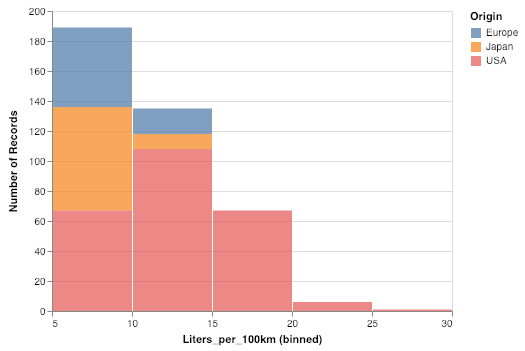

In [187]:
alt.Chart(cars).mark_bar(opacity=0.7).encode(
    alt.X('Liters_per_100km', bin=True),
    alt.Y('count()'),
    alt.Color('Origin')
)

Altair choisit automatiquement le type de représentation des données en fonction de ce qui est passé en paramètre. Par exemple en ajoutant un autre regroupement selon y, altair va directement créer une carte thermique (heat map)

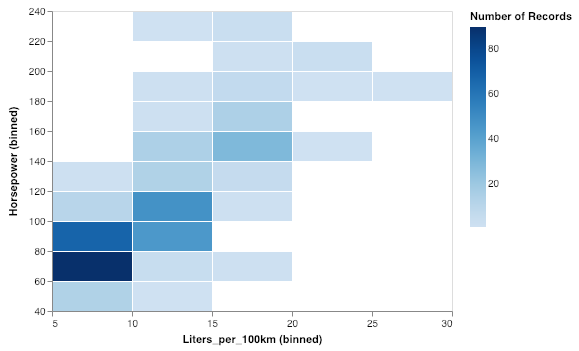

In [188]:
alt.Chart(cars).mark_bar().encode(
    alt.X('Liters_per_100km', bin=True),
    alt.Y('Horsepower', bin=True),
    color='count()'
)

In [189]:
# Petit aparté ...
cars[cars.Liters_per_100km>20]

,Acceleration,Cylinders,Displacement,Horsepower,Name,Origin,Year,Liters_per_100km,Weight_in_kg
31,14.0,8,360.0,215.0,ford f250,USA,1970-01-01,23.52,2093.0
32,15.0,8,307.0,200.0,chevy c20,USA,1970-01-01,23.52,1985.0
33,13.5,8,318.0,210.0,dodge d200,USA,1970-01-01,21.38,1987.0
34,18.5,8,304.0,193.0,hi 1200d,USA,1970-01-01,26.13,2146.0
74,11.0,8,429.0,208.0,mercury marquis,USA,1972-01-01,21.38,2101.0
110,14.0,8,400.0,150.0,chevrolet impala,USA,1973-01-01,21.38,2266.0
131,11.0,8,350.0,180.0,oldsmobile omega,USA,1973-01-01,21.38,1662.0


En jouant sur la manière dont les arguments sont passés à la fonction encode on peut afficher simplement des représentations différentes du même jeu de données.

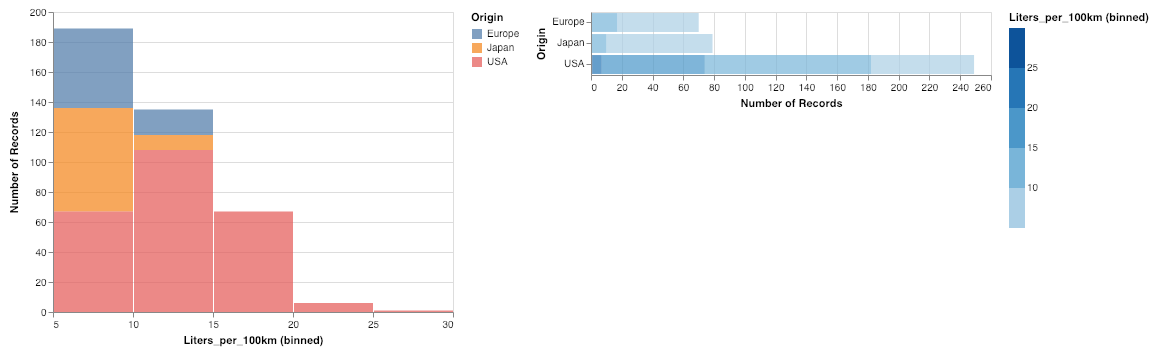

In [190]:
chart1 = alt.Chart(cars).mark_bar(opacity=0.7).encode(
    alt.X('Liters_per_100km', bin=True),
    alt.Y('count()'),
    alt.Color('Origin')
)

chart2 = alt.Chart(cars).mark_bar(opacity=0.7).encode(
    alt.Color('Liters_per_100km', bin=True),
    alt.X('count()'),
    alt.Y('Origin')
)

chart1 | chart2

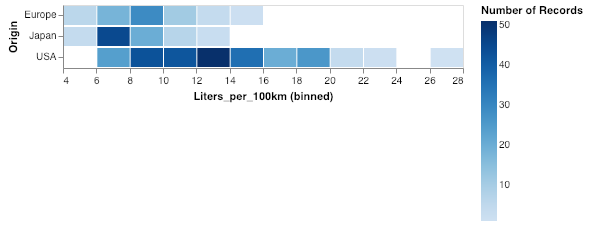

In [191]:
alt.Chart(cars).mark_bar().encode(
    alt.X('Liters_per_100km', bin=alt.Bin(maxbins=20)),
    alt.Color('count()'),
    alt.Y('Origin')
)

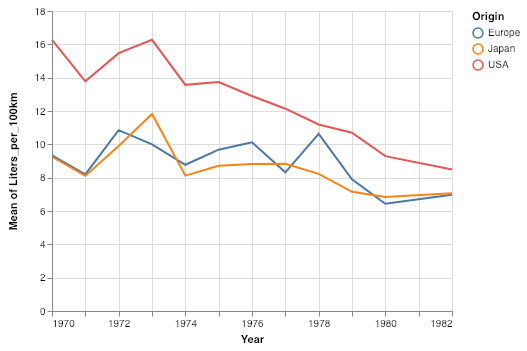

In [192]:
alt.Chart(cars).mark_line().encode(
    x = 'Year:T',
    y = 'mean(Liters_per_100km)',
    color = 'Origin'  
)

## Courbes avec intervalle de confiance
L'intervalle de confiance permet de représenter l'incertitude sur une courbe créée à partir de données limitées ou avec un bruit important.


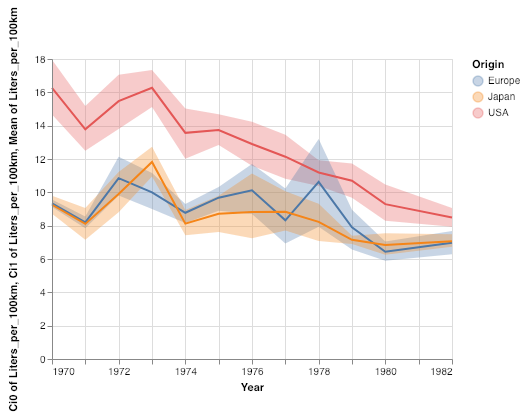

In [193]:
# Configure the base chart
base = alt.Chart(cars)

# Configure the line
line = base.mark_line().encode(
    x = 'Year',
    y = 'mean(Liters_per_100km)',
    color = 'Origin'
)

# Configure the confidence interval
confidence_interval = base.mark_area(opacity=0.3).encode(
    x = 'Year',
    y = 'ci0(Liters_per_100km)',
    y2 = 'ci1(Liters_per_100km)',
    color = 'Origin'
)

# Draw the chart
confidence_interval

confidence_interval + line

## Regroupements en intervalles de temps
Changement du jeu de données: températures horaires à Seattle durant l'année 2010

In [194]:
temperatures = data.seattle_temps()
# Conversion en degrés celsius
temperatures['temp']  = round((temperatures.temp - 32)*5/9,2)

In [195]:
temperatures.head()

,date,temp
0,2010-01-01 00:00:00,4.11
1,2010-01-01 01:00:00,4.00
2,2010-01-01 02:00:00,3.89
3,2010-01-01 03:00:00,3.83
4,2010-01-01 04:00:00,3.78


Si on créé directement le graphique suivant
```Python
alt.Chart(temperatures).mark_line(
    x = 'date:T',
    y = 'temp:Q'
)
```
Erreur MaxRowsError renvoyée car nd de lignes > 5000. C'est un garde fou car lors de l'utilisation de altair une copie du jeu de données est intégrer à chaque graphique ce qui peut faire planter le navigateur sur de gros jeux de données.

In [196]:
len(temperatures)

8759

Pour contourner le pb: utilisation de json pour sauvegarder le fichier temporaire sur l'ordi (et pas dans le navigateur)

In [197]:
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [198]:
alt.Chart(temps).mark_line().to_dict()

{'config': {'view': {'width': 400, 'height': 300}},
 'data': {'url': 'altair-data-3926d7fec5756b2f03fd130a0e94e23f.json',
  'format': {'type': 'json'}},
 'mark': 'line',
 '$schema': 'https://vega.github.io/schema/vega-lite/v2.6.0.json'}

On voit apparaître un fichier de données dans le répertoire de travail.

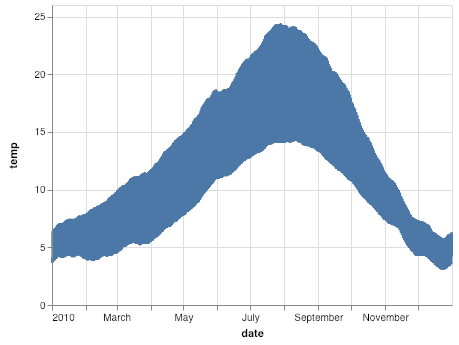

In [199]:
alt.Chart(temperatures).mark_line().encode(
    x = 'date:T',
    y = 'temp:Q'
)

Ce graphique est peu évocateur, il est possible de faire un regroupement automatique des données par mois en utilisant le mot clé `timeUnit`

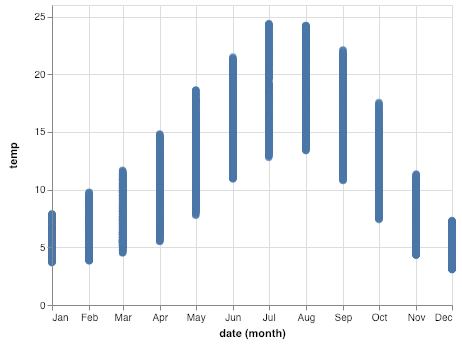

In [200]:
chart_spread = alt.Chart(temperatures).mark_point().encode(
    x = alt.X('date:T', timeUnit='month'),
    y = 'temp:Q'
)
chart_spread

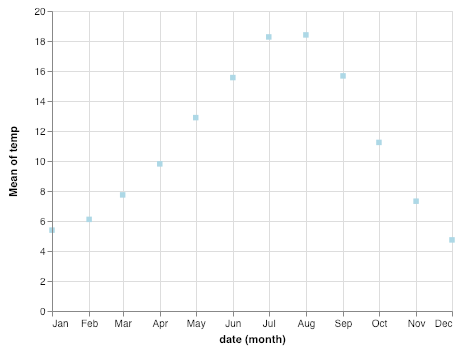

In [201]:
chart_mean = alt.Chart(temperatures).mark_square(color='lightblue').encode(
    x = alt.X('date:T', timeUnit='month'),
    y = 'mean(temp)'
)
chart_mean

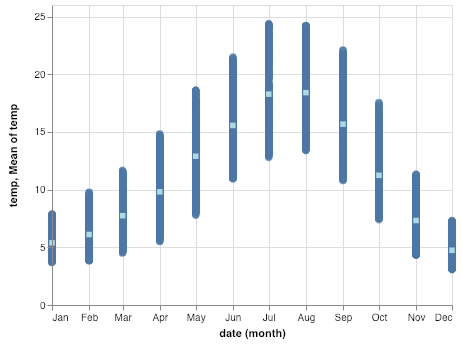

In [202]:
chart_spread + chart_mean

Représentation d'une aire entre les courbes min(temp) et max(temp)

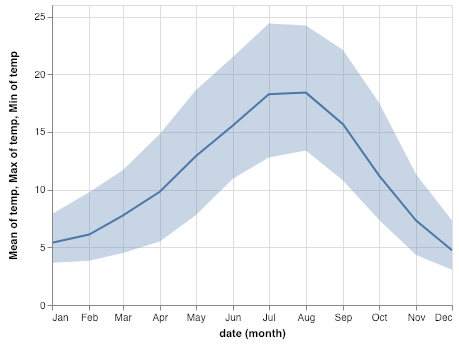

In [203]:
line = alt.Chart(temps).mark_line().encode(
    x = alt.X('date:T', timeUnit='month'),
    y = 'mean(temp):Q'
)
band = alt.Chart(temps).mark_area(opacity=0.3).encode(
    x = alt.X('date:T', timeUnit='month'),
    y = 'max(temp)',
    y2 = 'min(temp)'
)
line + band

Représentation de la température moyenne par heure et par mois

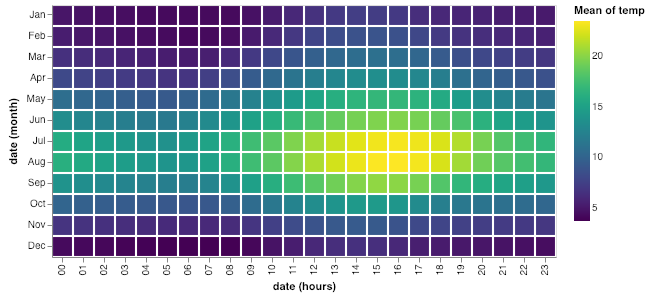

In [204]:
alt.Chart(temps).mark_rect().encode(
    x = alt.X('date:O', timeUnit='hours'),
    y = alt.Y('date:O', timeUnit='month'),
    color = 'mean(temp):Q'
)